In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("EuCitiesTemperatures.csv", header=0)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [4]:
#Preprocessing/Analysis
#1
df[['latitude', 'longitude']] = df.groupby(['country'], sort=False)[['latitude', 'longitude']].apply(lambda x: x.fillna(round(x.mean(axis=0),2))).droplevel('country')
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [5]:
#2
df.loc[(df['latitude'] >=40) & (df['latitude'] <=60) & (df['longitude'] >=15) & (df['longitude'] <=30)]['city']

0         Elbasan
6          Vienna
7           Minsk
8           Orsha
9           Pinsk
          ...    
165         Bursa
169        Edirne
183      Tekirdag
186    Chernivtsi
193         Rivne
Name: city, Length: 63, dtype: object

In [6]:
#2
filtered_series = df.loc[(df['latitude'] >=40) & (df['latitude'] <=60) & (df['longitude'] >=15) & (df['longitude'] <=30)].groupby(['country']).apply(lambda x: len(x))
filtered_series.loc[filtered_series == filtered_series.max()]

country
Poland     9
Romania    9
dtype: int64

In [7]:
#3
df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'yes'), ['region_type']] = 'Coastal EU Country'
df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'no'), ['region_type']] = 'Non-Coastal EU Country'
df.loc[(df['EU'] == 'no') & (df['coastline'] == 'no'), ['region_type']] = 'Non-Coastal Non-EU Country'
df.loc[(df['EU'] == 'no') & (df['coastline'] == 'yes'), ['region_type']] = 'Coastal Non-EU Country'
df['temperature'] = df.groupby(['region_type'], sort = False)['temperature'].apply(lambda x: x.fillna(x.mean(axis=0)))
df.drop(['region_type'], axis = 1)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000


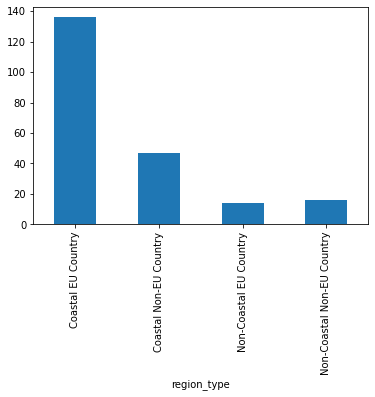

In [8]:
#Visualization
#1
df.groupby(['region_type'], sort = True)['city'].apply(lambda x: len(x)).plot(kind='bar')
#df = df.drop(['region_type'], axis = 1)
plt.show()

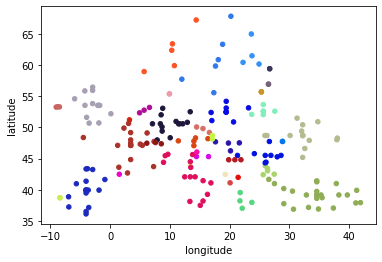

In [9]:
#2
color_map = df['country'].drop_duplicates().to_frame()
color_map['color'] = [np.random.rand(3) for country in df['country'].drop_duplicates()]
color_map.set_index('country', inplace=True)
df.plot(x='longitude', y='latitude', kind='scatter', c=pd.merge(df, color_map, left_on='country', right_index=True)['color'])
plt.show()

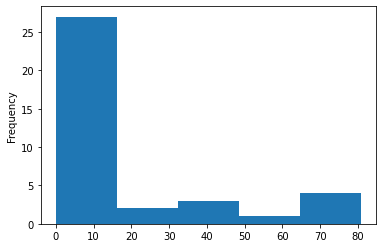

In [10]:
#3
df['population'].drop_duplicates().plot(kind='hist',bins=5)
plt.show()
#do we need to show each group's label?

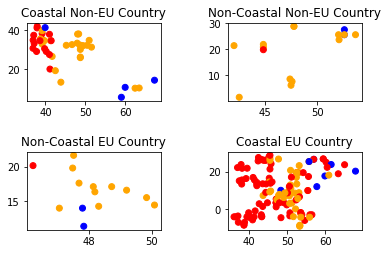

In [11]:
#4
fig, axes = plt.subplots(2,2)
fig.tight_layout(pad=3.0)

df.loc[df['temperature'] > 10, 'color'] = 'red'
df.loc[df['temperature'] < 6, 'color'] = 'blue'
df.loc[(df['temperature'] >= 6) & (df['temperature'] <= 10), 'color'] = 'orange'

regions = list(df['region_type'].drop_duplicates())
cnt = 0
for i in range(0, 2):
    for j in range(0, 2):
        region_df = df.loc[df['region_type'] == regions[cnt]]
        axes[i,j].scatter(region_df['latitude'], region_df['longitude'], color = region_df['color'])
        axes[i,j].set_title(regions[cnt])
        cnt +=1

plt.show()